In [1]:
#h-h-t = 1/8

In [68]:
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**The stats Submodule**

In [6]:
from scipy.stats import mode

In [4]:
mylist = [3,3,4,5,6,7,8]

In [51]:
#help(scipy.stats)

In [7]:
mode(mylist)

ModeResult(mode=array([3]), count=array([2]))

In [10]:
int(mode(mylist)[0])
mode(mylist)[0][0]

3

In [16]:
mylist2 = [3,3,4,4,5,6,7,8]

**Descriptive Statistics of the List**

In [17]:
scipy.stats.describe(mylist2)

DescribeResult(nobs=8, minmax=(3, 8), mean=5.0, variance=3.4285714285714284, skewness=0.4330127018922193, kurtosis=-1.1666666666666667)

**Contingency Tables**

In [19]:
hair = ["brown","black","black","brown","blond","blond"]
eyes = ["blue","brown","brown","green","blue","green"]

In [32]:
df = pd.DataFrame(zip(hair,eyes),columns=["hair","eyes"]) #create df from lists
df

,hair,eyes
0,brown,blue
1,black,brown
2,black,brown
3,brown,green
4,blond,blue
5,blond,green


In [33]:
pd.crosstab(df["hair"],df["eyes"])

eyes,blue,brown,green
hair,,,
black,0,2,0
blond,1,0,1
brown,1,0,1


**The linalg submodule**

In [34]:
import scipy.linalg

In [52]:
#help(scipy.linalg)

**Discrete Uniform Distribution-Saturday**

In [37]:
from scipy.stats import randint

In [43]:
uni = randint(1,7)

In [150]:
uni

In [42]:
help(randint.pmf)

Help on method pmf in module scipy.stats._distn_infrastructure:

pmf(k, *args, **kwds) method of scipy.stats._discrete_distns.randint_gen instance
    Probability mass function at k of the given RV.
    
    Parameters
    ----------
    k : array_like
        Quantiles.
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        Location parameter (default=0).
    
    Returns
    -------
    pmf : array_like
        Probability mass function evaluated at k



In [48]:
uni.pmf(4) #4 gelme ihtimali

0.16666666666666666

In [49]:
uni.cdf(2) #2 ve 2 den kücük gelme ihtimali

0.3333333333333333

In [149]:
help(randint.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(k, *args, **kwds) method of scipy.stats._discrete_distns.randint_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    k : array_like, int
        Quantiles.
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `k`.



In [153]:
X = uni.rvs(size=100) #100 kere zar atiyor

In [154]:
help(uni.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(size=None, random_state=None) method of scipy.stats._distn_infrastructure.rv_frozen instance



In [54]:
#probability mass function: how often the each function probability returns P(X=x) 2 gelme ihtimali

#cumulative distribution function: P(X =< x): 2 ve 2 den kücük gelme ihtimali

In [159]:
X

array([2, 1, 5, 6, 3, 3, 3, 3, 4, 1, 5, 1, 5, 6, 5, 1, 5, 3, 4, 1, 2, 6,
       6, 6, 4, 4, 1, 6, 4, 1, 4, 5, 1, 2, 5, 6, 2, 6, 4, 1, 5, 6, 6, 6,
       6, 3, 3, 5, 6, 4, 1, 4, 3, 2, 2, 5, 2, 2, 4, 1, 5, 2, 1, 6, 6, 3,
       4, 3, 4, 5, 4, 1, 1, 2, 2, 6, 3, 4, 1, 5, 4, 3, 2, 6, 3, 1, 2, 6,
       2, 4, 4, 4, 3, 6, 1, 3, 2, 4, 4, 5])

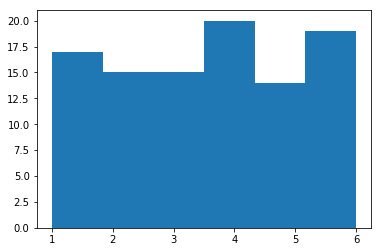

In [168]:
plt.hist(X, bins=6)
plt.show()

**Bernoulli Distribution**

In [66]:
# 2 outcomes success and fail, #sample space=1 success+failure=1

#p(1) = p # success
#p(0) = 1-p # failure

In [92]:
p = 0.4
bern = scipy.stats.bernoulli(p) #failure 0 and success 1

In [93]:
bern.pmf(0) #0 failure ve p=0.5 oldugundan 0 pmf 0-5 olacak ayni sey 1 icin de gecerli

#p=0.4 olsaydi, pmf(1) - 0.4, pmf(0) - 0.6 olacak cünkü p(0) = 1-p

0.6

In [94]:
bern.cdf(1)

1.0

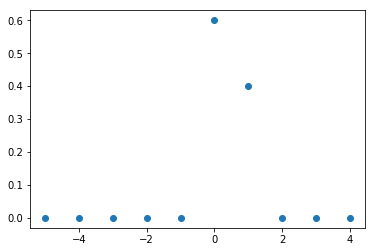

In [96]:
numrange = range(-5,5)
plt.plot(numrange,bern.pmf(numrange),"o") #0=0.6, 1=0.4

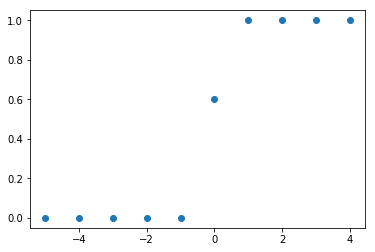

In [97]:
plt.plot(numrange,bern.cdf(numrange),"o") #0a esit ve kücük olma ihtimali 0.6, 1-2-3-4 icin de 1 

(array([6., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

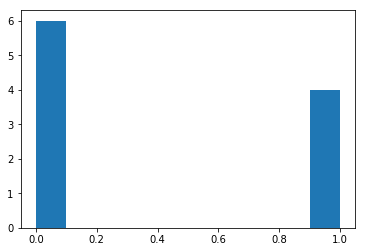

In [99]:
Y = bern.rvs(size=10)
plt.hist(Y)

**Binomial Distribution**

In [100]:
#n:number of trials/experiments
#p:probability of success

#parameters:(n,p)

In [110]:
#[(H,H),(T,T),(H,T),(T,H)]
#x: number of heads
#omega={0,1,2} 2 kere para atmaktan kac tane head gelebilir outcome üzerinden 2 kere gelebilir 1 kere gelebilir 0 gelebilir
#P(x=0) = 1/4 2 kere attiginda hic gelmeme ihtimali
#P(x=1) = 1/2 2 kere attiginda 1 kere gelme ihtiamli
#P(x=2) = 1/4 2 kere attiginda 2 kere gelme ihtiamli

In [111]:
p = 0.5 #1 kere atildiginda head gelme ihtimali
n = 2 # kac kere atacagiz

In [112]:
binomial = scipy.stats.binom(n,p)

In [116]:
binomial.pmf(2) #0.50 olasilik olan bir seyde 2kere attiginda 2sinin de head gelme ihtimali
# 2 1/4, 1 1/2, 0 1/4 gelecek

0.25

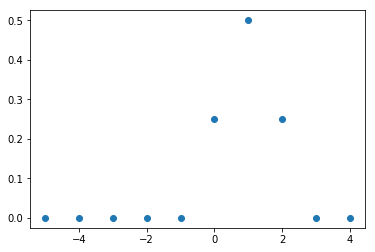

In [117]:
plt.plot(numrange,binomial.pmf(numrange),"o")

In [124]:
# cumulative 2 ve 2 den düsük head olma ihtimali hepsini kapsadigi icin 1, 0 da aymi pmf gibi ve 1 de 0.75 yani p(0) + p(1)
binomial.cdf(1)

0.75

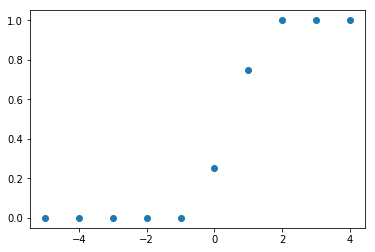

In [125]:
plt.plot(numrange,binomial.cdf(numrange),"o")

(array([31.,  0.,  0.,  0.,  0., 48.,  0.,  0.,  0., 21.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

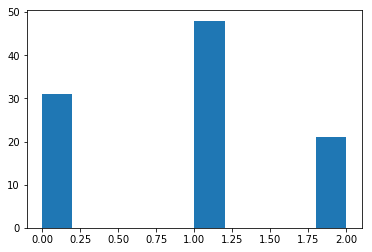

In [128]:
B = binomial.rvs(size=100)
plt.hist(B)

(array([17.,  0., 15.,  0., 15.,  0., 20.,  0., 14., 19.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

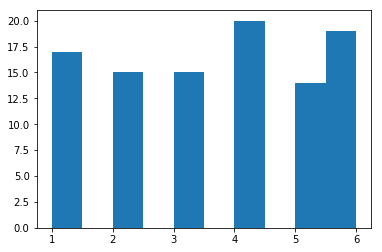

In [181]:
p = 0.5 #1 kere atildiginda head gelme ihtimali
n = 20 # kac kere atacagiz
binomial = scipy.stats.binom(n,p)
B = binomial.rvs(size=100)
plt.hist(X)

In [171]:
binomial

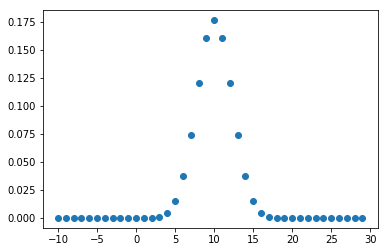

In [132]:
numrange = range(-10,30)
plt.plot(numrange,binomial.pmf(numrange),"o")
#20 kere para atildiginda 0.5 ihtimali olan seyin kac defa olacagi -10 ya da30 olamaz o yüzden 0 en yüksk ihtimal 10 kere olmasi


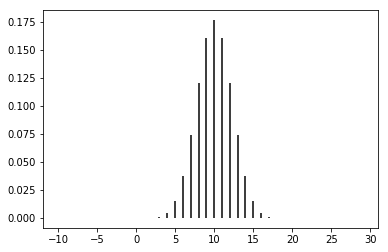

In [137]:
plt.vlines(numrange,0,binomial.pmf(numrange))

In [147]:
from scipy.stats import geom
geom.pmf(5, 0.7)

0.005670000000000003